# **Painting Dataset**

### **Data Description:**



### **Data Content:**


### **Data Dictionary:**

- ID = 
- Category = 
- Artist = 
- Title = 
- Year = 
- Image URL = 
- Painting Info URLe =
- Artist Info URL = 




#### Import libraries and read files

In [128]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.neighbors import LocalOutlierFactor #Outliar handling

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [148]:
df = pd.read_csv("data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [132]:
df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [178]:
df.shape

(4119, 8)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4119 non-null   object
 1   Category           4119 non-null   object
 2   Artist             4119 non-null   object
 3   Title              4119 non-null   object
 4   Year               4119 non-null   object
 5   Image URL          4119 non-null   object
 6   Painting Info URL  4119 non-null   object
 7   Artist Info URL    4119 non-null   object
dtypes: object(8)
memory usage: 257.6+ KB


In [181]:
df.Artist.value_counts()

Eyvind Earle             31
Pietro Perugino          23
Sam Francis              23
Mark Rothko              19
Willi Baumeister         19
                         ..
Gianfranco Baruchello     1
Lennart Rodhe             1
Arman                     1
Gerhard Richter           1
Oleg Holosiy              1
Name: Artist, Length: 1003, dtype: int64

/usr/local/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


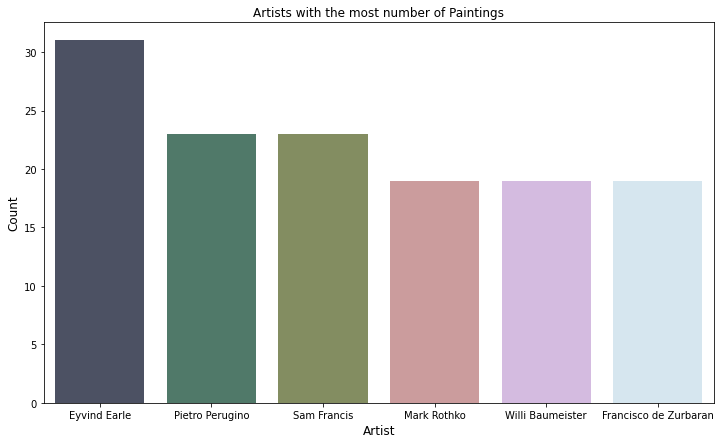

In [196]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

In [179]:
df.isnull().sum()

ID                   0
Category             0
Artist               0
Title                0
Year                 0
Image URL            0
Painting Info URL    0
Artist Info URL      0
dtype: int64

In [134]:
df.Year.value_counts()

1964         81
1962         68
1959         61
1963         59
1967         58
             ..
1475-1478     1
1495-1515     1
1913-1915     1
1747-1749     1
1584          1
Name: Year, Length: 656, dtype: int64

In [135]:
cat_1964 = df[(df.Year == '1964')]

In [136]:
cat_1964.Category

20         Neo-Expressionism
139             Art Informel
174        Neo-Expressionism
186               Minimalism
205               Minimalism
                ...         
3828            Art Informel
3893     Lyrical Abstraction
3902    Color Field Painting
4087                 Pop Art
4096                 Pop Art
Name: Category, Length: 81, dtype: object

In [97]:
df[['Category','Year']].value_counts()


Category           Year           
Neoclassicism      XVIII-XIX cent.    33
Minimalism         1967               27
Surrealism         1937               25
Minimalism         1968               23
                   1969               22
                                      ..
                   1967-1968           1
                   1970                1
Neo-Expressionism  1950                1
                   1951                1
Abstract Art       1883                1
Length: 1219, dtype: int64

In [197]:
df1 = pd.read_csv("data/artwork.csv")
df1.head(3)

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394.0,419.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311.0,213.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922.0,support: 343 x 467 mm,343.0,467.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69201 non-null  int64  
 1   accession_number    69201 non-null  object 
 2   artist              69201 non-null  object 
 3   artistRole          69201 non-null  object 
 4   artistId            69201 non-null  int64  
 5   title               69201 non-null  object 
 6   dateText            69201 non-null  object 
 7   medium              62817 non-null  object 
 8   creditLine          69198 non-null  object 
 9   year                63804 non-null  float64
 10  acquisitionYear     69156 non-null  float64
 11  dimensions          66768 non-null  object 
 12  width               65834 non-null  float64
 13  height              65859 non-null  float64
 14  depth               2514 non-null   float64
 15  units               65860 non-null  object 
 16  insc

In [199]:
df1.shape

(69201, 20)

In [215]:
df1.medium.value_counts()

Graphite on paper                                                   26127
Oil paint on canvas                                                  3325
Screenprint on paper                                                 2983
Lithograph on paper                                                  2720
Watercolour on paper                                                 1880
                                                                    ...  
Firebricks                                                              1
Oil paint, tempera and metallic paint on canvas                         1
Polyvinyl acetate paint and acrylic paint on foam on metal stand        1
Polyester resin, fibreglass and steel                                   1
Gallery lighting                                                        1
Name: medium, Length: 3388, dtype: int64

In [200]:
df1.artistRole.value_counts()

artist                      66907
after                        2014
attributed to                 164
manner of                      24
pupil of                       18
formerly attributed to         14
and other artists              12
prints after                   11
pseudo                          8
studio of                       7
imitator of                     5
and a pupil                     4
school of                       4
and assistants                  3
follower of                     2
doubtfully attributed to        1
and studio                      1
circle of                       1
style of                        1
Name: artistRole, dtype: int64

In [211]:
df1.drop('thumbnailCopyright', axis =1, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='and a pupil'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='after'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='attributed to'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='manner of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='pupil of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='formerly attributed to'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='and other artists'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='prints after'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='pseudo'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='studio of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='imitator of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='school of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='and assistants'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='follower of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='doubtfully attributed to'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='and studio'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='circle of'].index, inplace=True)
df1.drop(df1.loc[df1['artistRole']=='style of'].index, inplace=True)
df1.drop('artistRole', axis =1, inplace=True)

In [212]:
df1.shape

(66907, 18)

In [213]:
df1['artist'].value_counts()

Turner, Joseph Mallord William                                                                                              37930
Jones, George                                                                                                                1046
Moore, Henry, OM, CH                                                                                                          623
Daniell, William                                                                                                              612
Beuys, Joseph                                                                                                                 578
                                                                                                                            ...  
Hamilton, Anthea                                                                                                                1
Porter, Liliana                                                                           

/usr/local/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


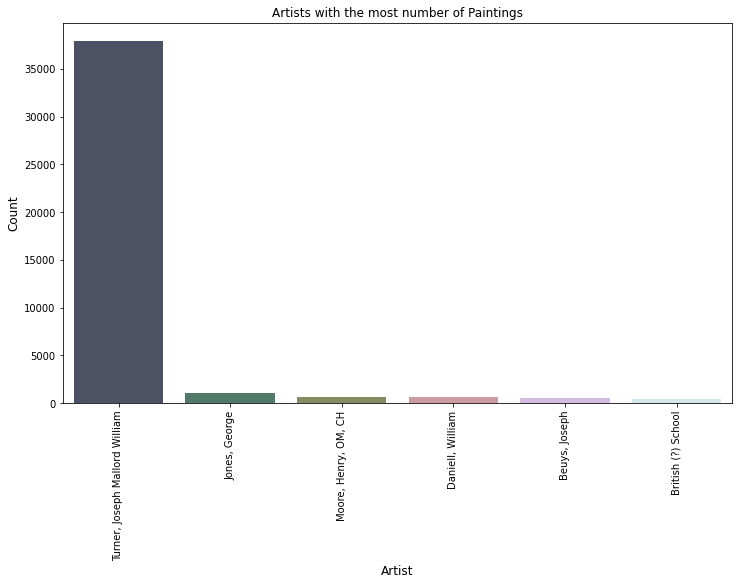

In [207]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df1['artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Modern = ['Impressionism','Pop Art', 'Neo-Expressionism', 'Art Informel', 'Post-Impressionism','Surrealism','Lyrical Abstraction',
'Abstract Expressionism','Abstract Art','Cubism','Magic Realism']

In [ ]:
Western = ['Realism','Northern Renaissance','Baroque', 'Rococo', 'Romanticism', 'Expressionism','Neoclassicism','Early Renaissance',
'High Renaissance']

In [ ]:
Contemporary = ['Minimalism' ]

In [81]:
Modern_df = df[(df.Category =='Cubism') | (df.Category =='Impressionism') |(df.Category =='Surrealism') ]

In [82]:
Modern

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
14,577284a7edc2cb3880fe813a,Cubism,Francis Picabia,Dances at the Spring,1912,https://uploads2.wikiart.org/images/francis-pi...,https://www.wikiart.org/en/francis-picabia/dan...,https://www.wikiart.org/en/francis-picabia
28,5772819cedc2cb3880f501c7,Surrealism,Eileen Agar,The Reaper,1938,https://uploads6.wikiart.org/images/eileen-aga...,https://www.wikiart.org/en/eileen-agar/the-rea...,https://www.wikiart.org/en/eileen-agar
44,57727f7bedc2cb3880ee1357,Cubism,Amadeo de Souza-Cardoso,Landscape,1912,https://uploads8.wikiart.org/images/amadeo-de-...,https://www.wikiart.org/en/amadeo-de-souza-car...,https://www.wikiart.org/en/amadeo-de-souza-car...
...,...,...,...,...,...,...,...,...
4039,577286e4edc2cb3880058bf0,Cubism,Wyndham Lewis,Creation Myth,1927,https://uploads2.wikiart.org/images/wyndham-le...,https://www.wikiart.org/en/wyndham-lewis/creat...,https://www.wikiart.org/en/wyndham-lewis
4046,57728401edc2cb3880fc8433,Impressionism,Marie Bracquemond,Woman with an Umbrella,1880,https://uploads6.wikiart.org/images/marie-brac...,https://www.wikiart.org/en/marie-bracquemond/w...,https://www.wikiart.org/en/marie-bracquemond
4081,57727dacedc2cb3880e872bb,Surrealism,Andre Masson,Pupae to Toledo,1935,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson
4091,57727dadedc2cb3880e8733b,Surrealism,Andre Masson,Iconic views of Toledo,1936,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson


#### Data Exploring:

In [27]:
# check for duplicates
df.duplicated().sum()

0

In [28]:
# check for missing values
df.isnull().sum().sum()

233881

In [59]:
df1.isnull().sum().sum()

0

In [58]:
#Summary Stats
df1.describe()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
count,4119,4119,4119,4119,4119,4119,4119,4119
unique,4119,46,1003,3764,656,4119,4119,1004
top,58c6237dedc2c9c7dc0de1ae,Realism,Eyvind Earle,Untitled,1964,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/eyvind-earle
freq,1,200,31,141,81,1,1,31


In [57]:
{col:df1[col].nunique() for col in df1}

{'ID': 4119,
 'Category': 46,
 'Artist': 1003,
 'Title': 3764,
 'Year': 656,
 'Image URL': 4119,
 'Painting Info URL': 4119,
 'Artist Info URL': 1004}

#### Checking for Multicollinearity

In [56]:
#check the corrolation
df.corr()

,id,artistId,year,acquisitionYear,width,height,depth
id,1.000000,0.418521,0.025067,-0.139811,-0.111952,-0.104898,-0.039888
artistId,0.418521,1.000000,0.508052,0.448369,0.215947,0.167227,0.006029
year,0.025067,0.508052,1.000000,0.816581,0.487440,0.383214,0.162612
acquisitionYear,-0.139811,0.448369,0.816581,1.000000,0.422799,0.335742,0.034133
width,-0.111952,0.215947,0.487440,0.422799,1.000000,0.725322,0.198728
height,-0.104898,0.167227,0.383214,0.335742,0.725322,1.000000,0.393222
depth,-0.039888,0.006029,0.162612,0.034133,0.198728,0.393222,1.000000
